In [7]:
import random
import time
import math
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from scipy.stats import norm
import scipy

In [8]:
random.seed(time.time())

# 1. Box Muller Algorithm

In [9]:
#Question 2

def Box_Muller(n= 1):
    res = []
    for i in range(int(n/2)+1):
        u1 = random.uniform(0,1)
        u2 = random.uniform(0,1)
        r = - 2 * math.log(u1)
        theta = 2 * math.pi * u2
        res.append(math.sqrt(r) * math.cos(theta))
        res.append(math.sqrt(r) * math.sin(theta))
    return res

In [10]:
current_time = time.time()
sample = Box_Muller(10000)
print(time.time() - current_time, "secondes")

0.010370016098022461 secondes


(array([0.00194398, 0.00194398, 0.00129599, 0.00259198, 0.00777593,
        0.00907192, 0.01814384, 0.01749584, 0.0226798 , 0.03693567,
        0.05767149, 0.0673914 , 0.10951102, 0.11339899, 0.15487062,
        0.20865414, 0.21448609, 0.2805815 , 0.30974124, 0.32594109,
        0.34926889, 0.39592447, 0.39527648, 0.38555656, 0.39527648,
        0.3589888 , 0.33436502, 0.32075714, 0.29094941, 0.27539755,
        0.20865414, 0.19180629, 0.14903867, 0.11987893, 0.1004391 ,
        0.06933538, 0.05767149, 0.03758367, 0.02591977, 0.01814384,
        0.01749584, 0.00712794, 0.00647994, 0.00518395, 0.00064799,
        0.00129599, 0.        , 0.        , 0.        , 0.00064799]),
 array([-3.59767883, -3.44338733, -3.28909582, -3.13480432, -2.98051281,
        -2.82622131, -2.6719298 , -2.5176383 , -2.36334679, -2.20905529,
        -2.05476378, -1.90047228, -1.74618077, -1.59188927, -1.43759776,
        -1.28330626, -1.12901475, -0.97472325, -0.82043174, -0.66614024,
        -0.51184874, -0.35

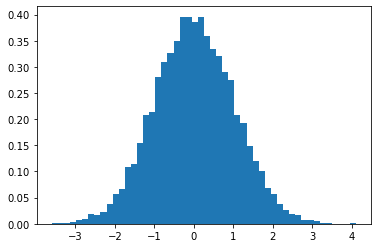

In [5]:
plt.hist(sample,density=True, bins = 50)

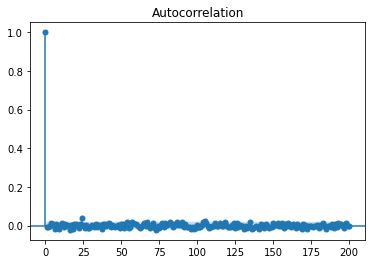

In [6]:
plot_acf(sample,lags=200)
plt.show()

In [7]:
def Marsaglia(n=1):
    res = []
    for i in range(n):
        u1 = random.uniform(-1,1)
        u2 = random.uniform(-1,1)
        while (u1**2 + u2**2 > 1):
            u1 = random.uniform(-1,1)
            u2 = random.uniform(-1,1)
        z = u1**2 + u2**2
        r = - 2 * math.log(z)
        res.append((math.sqrt(r) * u1 / math.sqrt(z)))
        res.append((math.sqrt(r) * u2 / math.sqrt(z)))
    return res

In [8]:
#Question 5

current_time = time.time()
sample=Marsaglia(10000)
print(time.time() - current_time, "secondes")

0.027707815170288086 secondes


(array([9.86795993e-04, 3.28931998e-04, 9.86795993e-04, 6.57863996e-04,
        9.86795993e-04, 5.59184396e-03, 4.93397997e-03, 9.53902794e-03,
        1.71044639e-02, 1.61176679e-02, 3.38799958e-02, 3.94718397e-02,
        4.96687317e-02, 7.23650395e-02, 9.76928034e-02, 1.29270275e-01,
        1.54269107e-01, 1.78939007e-01, 2.17095119e-01, 2.57224822e-01,
        3.06564622e-01, 3.26958406e-01, 3.48338986e-01, 3.76627138e-01,
        3.73008886e-01, 4.20046161e-01, 3.97020921e-01, 3.81232185e-01,
        3.53601898e-01, 3.25642678e-01, 3.06564622e-01, 2.65448122e-01,
        2.28278806e-01, 2.00977451e-01, 1.75649687e-01, 1.36835711e-01,
        9.07852314e-02, 7.96015435e-02, 6.08524196e-02, 4.07875677e-02,
        2.66434918e-02, 2.30252398e-02, 1.61176679e-02, 1.21704839e-02,
        6.57863996e-03, 4.93397997e-03, 3.61825198e-03, 2.63145598e-03,
        3.28931998e-04, 6.57863996e-04]),
 array([-3.90597767, -3.75397056, -3.60196346, -3.44995636, -3.29794926,
        -3.14594215, 

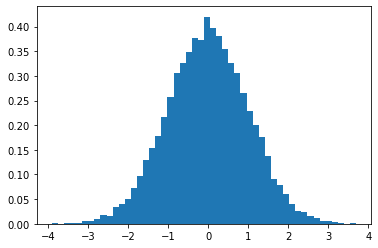

In [19]:
plt.hist(sample,density=True, bins = 50)

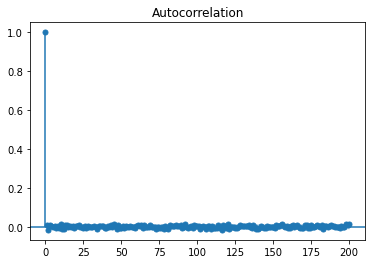

In [20]:
plot_acf(sample,lags=200)
plt.show()

# 2. Acceptance-Rejection Method

In [21]:
#Question 3

def normal_density(x):
    return(2/math.sqrt(2*math.pi) * math.exp(-0.5 * x **2))
           
def exponential_density(x):
    return(math.exp(-x))

def acceptance_rejection(n=1):
    M = math.exp(0.5) * math.sqrt(2/math.pi)
    res = []
    nb_try = 0
    for i in range(n):
        u1 = random.uniform(0,1)
        y = - np.log(u1)
        u2 = random.uniform(0,1)
        nb_try +=1
        while(u2 > normal_density(y)/ ( M * exponential_density(y))):
            u1 = random.uniform(0,1)
            y = - np.log(u1)
            u2 = random.uniform(0,1)
            nb_try +=1
        res.append(y)
    print("The acceptance ratio is",n/nb_try *100, "%")
    return res

The acceptance ratio is 76.03406326034063 %


(array([0.78476272, 0.79270298, 0.71991723, 0.77285232, 0.7450614 ,
        0.73447438, 0.70800684, 0.72388737, 0.64183797, 0.6286042 ,
        0.60346003, 0.55714183, 0.4830327 , 0.46847555, 0.44465476,
        0.42745086, 0.37980928, 0.32290405, 0.30305339, 0.24482479,
        0.24217804, 0.20777023, 0.17203904, 0.17997931, 0.15880527,
        0.12969097, 0.12175071, 0.0873429 , 0.06881562, 0.07807926,
        0.06616886, 0.05293509, 0.03308443, 0.02779092, 0.0291143 ,
        0.0291143 , 0.00926364, 0.01058702, 0.00794026, 0.00794026,
        0.00264675, 0.00397013, 0.00397013, 0.00661689, 0.        ,
        0.00264675, 0.00132338, 0.00264675, 0.00132338, 0.00132338]),
 array([4.04324623e-05, 7.56046744e-02, 1.51168916e-01, 2.26733158e-01,
        3.02297400e-01, 3.77861642e-01, 4.53425884e-01, 5.28990126e-01,
        6.04554368e-01, 6.80118610e-01, 7.55682852e-01, 8.31247094e-01,
        9.06811335e-01, 9.82375577e-01, 1.05793982e+00, 1.13350406e+00,
        1.20906830e+00, 1.2846

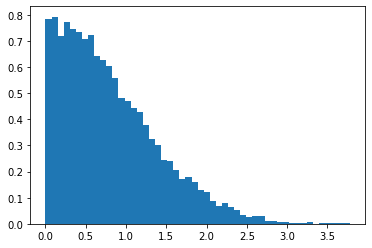

In [22]:
sample = acceptance_rejection(10000)
plt.hist(sample, density=True, bins = 50)

(array([8.95677356e-01, 7.08155216e-01, 6.13922985e-01, 4.54199354e-01,
        4.08496722e-01, 3.19447263e-01, 2.50186573e-01, 2.14849487e-01,
        1.58781309e-01, 1.34280929e-01, 9.04629418e-02, 9.84726815e-02,
        6.40779171e-02, 5.55970163e-02, 3.72217313e-02, 4.42891486e-02,
        2.96831528e-02, 3.06254751e-02, 1.97887685e-02, 1.31925123e-02,
        1.50771570e-02, 1.08367066e-02, 8.00973964e-03, 7.53857848e-03,
        5.18277271e-03, 3.76928924e-03, 3.29812809e-03, 2.35580578e-03,
        2.82696693e-03, 3.29812809e-03, 1.41348347e-03, 1.41348347e-03,
        1.88464462e-03, 4.71161155e-04, 4.71161155e-04, 0.00000000e+00,
        0.00000000e+00, 4.71161155e-04, 0.00000000e+00, 9.42322311e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.71161155e-04, 4.71161155e-04]),
 array([8.02832921e-05, 2.12321889e-01, 4.24563494e-01, 6.36805099e-01,
        8.49046705e-01

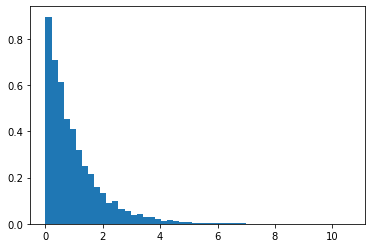

In [23]:
test = []
for i in range(10000):
    u1 = random.uniform(0,1)
    test.append(-math.log(u1))
plt.hist(test,bins=50,density=True)

The acceptance ratio is 76.33005114113428 %
0.043886661529541016 secondes


(array([0.00064726, 0.00064726, 0.        , 0.00064726, 0.00194179,
        0.00323631, 0.00258905, 0.00970893, 0.01100345, 0.01553428,
        0.03106857, 0.04142476, 0.05825356, 0.06407892, 0.0932057 ,
        0.12945236, 0.15793188, 0.20194569, 0.21294914, 0.27702806,
        0.27832258, 0.34887412, 0.35728852, 0.38058995, 0.39871328,
        0.37605912, 0.38512078, 0.40906947, 0.34369603, 0.3475796 ,
        0.28414794, 0.27249723, 0.22265807, 0.17864426, 0.150812  ,
        0.11262356, 0.09061665, 0.07184606, 0.04336654, 0.03495214,
        0.02524321, 0.01877059, 0.01100345, 0.00906167, 0.00258905,
        0.00129452, 0.00194179, 0.00064726, 0.00064726, 0.00064726]),
 array([-3.9169193 , -3.76242231, -3.60792533, -3.45342834, -3.29893136,
        -3.14443437, -2.98993738, -2.8354404 , -2.68094341, -2.52644643,
        -2.37194944, -2.21745245, -2.06295547, -1.90845848, -1.7539615 ,
        -1.59946451, -1.44496753, -1.29047054, -1.13597355, -0.98147657,
        -0.82697958, -0.67

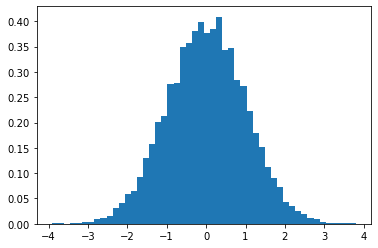

In [24]:
#Question 5
current_time = time.time()
sample = acceptance_rejection(10000)
for i in range(len(sample)):
    sample[i] = sample[i] * np.sign(random.uniform(-1,1))
print(time.time() - current_time, "secondes")
plt.hist(sample,density=True,bins=50)

# 3. Black-Scholes Call

## Standard Monte Carlo

In [15]:
def Call_MC(st, t, T, sigma, r, K, n = 1000):
    normal = Box_Muller(n)
    payoff = []
    for i in range(n):
        g = normal[i]
        sT = st * math.exp((r - 0.5 * sigma**2)*(T-t) + sigma * math.sqrt(T-t) * g)
        payoff.append(max(sT-K,0))
    mu = math.exp(-r*(T-t))*np.mean(payoff)
    std = np.std(payoff)
    alpha = 2.576
    print("MC price: %f in [%f,%f] std: %f" %(mu, mu - alpha * std / math.sqrt(n) , mu + alpha * std / math.sqrt(n),std))
    return(mu)

In [16]:
_ = Call_MC(100,0,0.5,0.2, 0.01 ,100, 10000)

MC price: 5.909096 in [5.672861,6.145331] std: 9.170608


In [23]:
def Call_formula(st, t, T, sigma, r, K):
    d1 = (math.log(st/K) + (r+0.5* sigma**2)*(T-t)) / (sigma*math.sqrt(T-t))
    d2 = d1 - sigma* math.sqrt(T-t)
    ans = st* norm.cdf(d1) - K * math.exp(-r*(T-t)) * norm.cdf(d2)
    print("BS price: %f"%(ans) )
    return ans

In [24]:
_ = Call_formula(70,0,0.5, 0.2, 0.01,100)

BS price: 0.024595


In [13]:
for K in np.linspace(0.5,1.5,11):
    print("Strike:\033[1m %d \033[0m" %(K*100))
    Call_MC(100,0,0.5, 0.2, 0.01,K*100,100000)
    Call_formula(100,0,0.5, 0.2, 0.01,K*100)

Strike: 50 
MC price: 50.240389 in [50.124237,50.356542] std: 14.258807
BS price: 50.249377
Strike: 60 
MC price: 40.297572 in [40.181542,40.413603] std: 14.243785
BS price: 40.299602
Strike: 70 
MC price: 30.338210 in [30.222238,30.454183] std: 14.236683
BS price: 30.368856
Strike: 80 
MC price: 20.648985 in [20.536814,20.761157] std: 13.770034
BS price: 20.682715
Strike: 90 
MC price: 12.101010 in [12.001932,12.200089] std: 12.162830
BS price: 12.111581
Strike: 100 
MC price: 5.898371 in [5.823204,5.973538] std: 9.227464
BS price: 5.876024
Strike: 110 
MC price: 2.342495 in [2.294010,2.390980] std: 5.951975
BS price: 2.339421
Strike: 120 
MC price: 0.776346 in [0.748552,0.804140] std: 3.411960
BS price: 0.774139
Strike: 130 
MC price: 0.212618 in [0.198665,0.226571] std: 1.712860
BS price: 0.217975
Strike: 140 
MC price: 0.053578 in [0.047052,0.060104] std: 0.801153
BS price: 0.053596
Strike: 150 
MC price: 0.012681 in [0.009486,0.015876] std: 0.392235
BS price: 0.011791


# 4. Variance Reduction

### 1. Anthitetic variable

In [31]:
def Call_MC_anthitetic_variable(st, t, T, sigma, r, K, n = 10000):
    normal = Box_Muller(n)
    payoff = []
    for i in range(n//2):
        g1, g2= normal[i], -normal[i]
        sT1 = st * math.exp((r - 0.5 * sigma**2)*(T-t) + sigma * math.sqrt(T-t) * g1)
        sT2 = st * math.exp((r - 0.5 * sigma**2)*(T-t) + sigma * math.sqrt(T-t) * (g2))
        payoff.append((max(sT1-K,0) + max(sT2-K,0))/2)
    mu = math.exp(-r*(T-t))*np.mean(payoff)
    std = np.std(payoff)
    alpha = 2.576
    print("MC price: %f in [%f,%f] std: %f (Anthitetic variable)" %(mu, mu - alpha * std / math.sqrt(n) , mu + alpha * std / math.sqrt(n),std))
    return(mu)

In [32]:
_ = Call_MC_anthitetic_variable(100,0,0.5,0.2, 0.01 ,100)

MC price: 5.882663 in [5.754664,6.010662] std: 4.968902 (Anthitetic variable)


In [33]:
for K in np.linspace(0.5,1.5,11):
    print("Strike:\033[1m %d \033[0m" %(K*100))
    Call_MC(100,0,0.5, 0.2, 0.01,K*100)
    Call_MC_anthitetic_variable(100,0,0.5, 0.2, 0.01,K*100)
    Call_formula(100,0,0.5, 0.2, 0.01,K*100)

Strike: 50 
MC price: 50.078940 in [48.894375,51.263506] std: 14.541636
MC price: 50.253988 in [50.217622,50.290354] std: 1.411724 (Anthitetic variable)
BS price: 50.249377
Strike: 60 
MC price: 40.915536 in [39.779489,42.051583] std: 13.946025
MC price: 40.274572 in [40.238949,40.310195] std: 1.382888 (Anthitetic variable)
BS price: 40.299602
Strike: 70 
MC price: 29.563188 in [28.432286,30.694090] std: 13.882862
MC price: 30.393873 in [30.352559,30.435187] std: 1.603786 (Anthitetic variable)
BS price: 30.368856
Strike: 80 
MC price: 20.708723 in [19.534223,21.883223] std: 14.418073
MC price: 20.613009 in [20.554654,20.671364] std: 2.265330 (Anthitetic variable)
BS price: 20.682715
Strike: 90 
MC price: 11.775337 in [10.787147,12.763527] std: 12.130944
MC price: 12.147345 in [12.044490,12.250201] std: 3.992827 (Anthitetic variable)
BS price: 12.111581
Strike: 100 
MC price: 5.675487 in [4.957532,6.393443] std: 8.813569
MC price: 5.907503 in [5.780503,6.034503] std: 4.930128 (Anthiteti

### 2. Control Variate

In [34]:
def Call_MC_control_variate(st, t, T, sigma, r, K, n = 1000):
    normal = Box_Muller(n)
    payoff = []
    underlying = []
    for i in range(n):
        g = normal[i]
        sT = st * math.exp((r - 0.5 * sigma**2)*(T-t) + sigma * math.sqrt(T-t) * g)
        payoff.append(max(sT-K,0))
        underlying.append(sT)
    
    std_g_tilde = np.std(payoff)
    std_s_tilde = np.std(underlying)
    correl = np.corrcoef(payoff,underlying)[0,1]
    c = correl * std_g_tilde / std_s_tilde
    
    sample = []
    expectation_s = st * math.exp(r*(T-t))
    for i in range(n):
        sample.append(payoff[i] - c*(underlying[i] - expectation_s))
        
    mu = math.exp(-r*(T-t))*np.mean(sample)
    std = np.std(sample)
    alpha = 2.576
    print("MC price: %f in [%f,%f] std: %f (Control variate)" %(mu, mu - alpha * std / math.sqrt(n) , mu + alpha * std / math.sqrt(n),std))
    return(mu)

In [35]:
Call_MC_control_variate(100,0,0.5, 0.2, 0.01,100)

MC price: 5.870981 in [5.515656,6.226306] std: 4.361942 (Control variate)


5.870980649259833

In [36]:
for K in np.linspace(0.5,1.5,11):
    print("Strike:\033[1m %d \033[0m" %(K*100))
    Call_MC(100,0,0.5, 0.2, 0.01,K*100)
    Call_MC_control_variate(100,0,0.5, 0.2, 0.01,K*100)
    Call_formula(100,0,0.5, 0.2, 0.01,K*100)

Strike: 50 
MC price: 50.752450 in [49.594461,51.910440] std: 14.215388
MC price: 50.249376 in [50.249376,50.249376] std: 0.000000 (Control variate)
BS price: 50.249377
Strike: 60 
MC price: 40.772186 in [39.635660,41.908711] std: 13.951897
MC price: 40.299251 in [40.299251,40.299251] std: 0.000000 (Control variate)
BS price: 40.299602
Strike: 70 
MC price: 29.288888 in [28.154365,30.423411] std: 13.927317
MC price: 30.379083 in [30.341430,30.416735] std: 0.462217 (Control variate)
BS price: 30.368856
Strike: 80 
MC price: 21.103005 in [19.962245,22.243766] std: 14.003888
MC price: 20.742562 in [20.618417,20.866707] std: 1.523992 (Control variate)
BS price: 20.682715
Strike: 90 
MC price: 12.125676 in [11.140097,13.111255] std: 12.098892
MC price: 12.134600 in [11.885033,12.384167] std: 3.063669 (Control variate)
BS price: 12.111581
Strike: 100 
MC price: 5.848756 in [5.112833,6.584678] std: 9.034131
MC price: 6.121847 in [5.760962,6.482732] std: 4.430196 (Control variate)
BS price: 5.

### 3. Importance sampling

In [32]:
def Call_MC_importance_sampling(st, t, T, sigma, r, K, n = 1000):
    m = (math.log(K/st) - (r- 0.5 * sigma**2)*(T-t) )/(sigma*math.sqrt(T-t))
    print(m)
    normal = Box_Muller(n)
    payoff = []
    for i in range(n):
        h = normal[i]+m
        sT = st * math.exp((r - 0.5 * sigma**2)*(T-t) + sigma * math.sqrt(T-t) * h)
        payoff.append(max(sT-K,0)* math.exp(-m*h + 0.5*m**2))
    mu = math.exp(-r*(T-t))*np.mean(payoff)
    std = np.std(payoff)
    alpha = 2.576
    print("MC price: %f in [%f,%f] std: %f (Importance sampling)" %(mu, mu - alpha * std / math.sqrt(n) , mu + alpha * std / math.sqrt(n),std))
    return(mu)

In [41]:
_ = Call_formula(60,0,0.5,0.2,0.01,100)
_ = Call_MC(60,0,0.5,0.2,0.01,100,10000)
_ = Call_MC_importance_sampling(60,0,0.5,0.2,0.01,100)

BS price: 0.000469
au dessus
au dessus
MC price: 0.000366 in [-0.000481,0.001212] std: 0.032854
3.647437964747127
MC price: 0.000468 in [0.000414,0.000521] std: 0.000660 (Importance sampling)


In [40]:
print("Importance sampling results\n")
for K in [100,110,120,130,140,150]:
    print("Strike:\033[1m %d \033[0m" %(K))
    Call_MC(100,0,0.5, 0.2, 0.01,K)
    Call_MC_importance_sampling(100,0,0.5, 0.2, 0.01,K)
    Call_formula(100,0,0.5, 0.2, 0.01,K)

Importance sampling results

Strike: 100 
MC price: 5.378126 in [4.680689,6.075562] std: 8.561673
MC price: 5.796916 in [5.087036,6.506796] std: 8.714435 (Importance sampling)
BS price: 5.876024
Strike: 110 
MC price: 2.219966 in [1.769165,2.670766] std: 5.533994
MC price: 2.388089 in [2.162376,2.613803] std: 2.770843 (Importance sampling)
BS price: 2.339421
Strike: 120 
MC price: 0.674499 in [0.431569,0.917430] std: 2.982196
MC price: 0.761503 in [0.690979,0.832026] std: 0.865741 (Importance sampling)
BS price: 0.774139
Strike: 130 
MC price: 0.262967 in [0.101366,0.424568] std: 1.983801
MC price: 0.228706 in [0.207784,0.249629] std: 0.256843 (Importance sampling)
BS price: 0.217975
Strike: 140 
MC price: 0.062615 in [-0.012092,0.137323] std: 0.917106
MC price: 0.057732 in [0.052358,0.063106] std: 0.065971 (Importance sampling)
BS price: 0.053596
Strike: 150 
MC price: 0.010102 in [-0.009214,0.029417] std: 0.237114
MC price: 0.012120 in [0.010876,0.013364] std: 0.015275 (Importance sa

## Summary

In [41]:
for K in np.linspace(0.5,1.5,11):
    print("Strike:\033[1m %d \033[0m" %(K*100))
    Call_formula(100,0,0.5, 0.2, 0.01,K*100)
    Call_MC(100,0,0.5, 0.2, 0.01,K*100)
    Call_MC_anthitetic_variable(100,0,0.5, 0.2, 0.01,K*100)
    Call_MC_control_variate(100,0,0.5, 0.2, 0.01,K*100)
    Call_MC_importance_sampling(100,0,0.5, 0.2, 0.01,K*100)

Strike: 50 
BS price: 50.249377
MC price: 50.632686 in [49.456643,51.808729] std: 14.437011
MC price: 50.277217 in [50.240105,50.314329] std: 1.440681 (Anthitetic variable)
MC price: 50.249376 in [50.249376,50.249376] std: 0.000000 (Control variate)
MC price: 16.955442 in [-15.869156,49.780041] std: 402.952229 (Importance sampling)
Strike: 60 
BS price: 40.299602
MC price: 40.275019 in [39.094825,41.455213] std: 14.487971
MC price: 40.294494 in [40.258506,40.330482] std: 1.397048 (Anthitetic variable)
MC price: 40.299251 in [40.299251,40.299251] std: 0.000000 (Control variate)
MC price: 24.087510 in [-6.974827,55.149847] std: 381.318843 (Importance sampling)
Strike: 70 
BS price: 30.368856
MC price: 30.211469 in [29.015504,31.407434] std: 14.681569
MC price: 30.354155 in [30.313712,30.394599] std: 1.570016 (Anthitetic variable)
MC price: 30.384865 in [30.352893,30.416837] std: 0.392489 (Control variate)
MC price: 60.027737 in [-20.986385,141.041860] std: 994.523094 (Importance sampling

# 6. Van der Corput Sequence

### Q1. Van der Corput term

In [17]:
def vdc(k,base):
    value = 0
    denom = 1
    while k >0:
        k, remainder = divmod(k, base)
        denom *= base
        value += remainder / denom
    return value

In [18]:
for i in range(8):
    print(vdc(i,2), end=" ")

0 0.5 0.25 0.75 0.125 0.625 0.375 0.875 

### Q3. Van der Corput sequence

In [19]:
def vdc_sequence(n_sample, base=2):
    sequence = []
    for i in range(1,n_sample+1):
        n_th_number, denom = 0, 1.
        while i > 0:
            i, remainder = divmod(i, base)
            denom *= base
            n_th_number += remainder / denom
        sequence.append(n_th_number)

    return sequence

(array([1.00618424, 0.99818277, 1.00218351, 0.99818277, 0.99818277,
        1.00218351, 1.00018314, 1.00018314, 1.00018314, 0.99618241,
        1.00418387, 0.99818277, 1.00018314, 1.00018314, 0.99818277,
        1.00218351, 1.00018314, 0.99818277, 1.00218351, 0.99818277]),
 array([6.10351562e-05, 5.00518799e-02, 1.00042725e-01, 1.50033569e-01,
        2.00024414e-01, 2.50015259e-01, 3.00006104e-01, 3.49996948e-01,
        3.99987793e-01, 4.49978638e-01, 4.99969482e-01, 5.49960327e-01,
        5.99951172e-01, 6.49942017e-01, 6.99932861e-01, 7.49923706e-01,
        7.99914551e-01, 8.49905396e-01, 8.99896240e-01, 9.49887085e-01,
        9.99877930e-01]),
 <BarContainer object of 20 artists>)

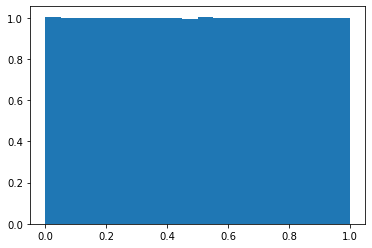

In [20]:
sample1 = vdc_sequence(10000,base=2)
plt.hist(sample1,bins =20, density=True )

(array([1.06813633, 0.95612204, 0.92811846, 0.96612331, 1.01212918,
        1.04013276, 1.12414348, 0.99612714, 0.97612459, 0.92411795,
        1.00012765, 0.89011361, 0.97412433, 1.00612842, 1.00812867,
        1.03413199, 1.01212918, 1.05813506, 0.99412689, 1.03413199]),
 array([7.34891830e-05, 5.00671074e-02, 1.00060726e-01, 1.50054344e-01,
        2.00047962e-01, 2.50041580e-01, 3.00035198e-01, 3.50028816e-01,
        4.00022435e-01, 4.50016053e-01, 5.00009671e-01, 5.50003289e-01,
        5.99996907e-01, 6.49990525e-01, 6.99984144e-01, 7.49977762e-01,
        7.99971380e-01, 8.49964998e-01, 8.99958616e-01, 9.49952234e-01,
        9.99945853e-01]),
 <BarContainer object of 20 artists>)

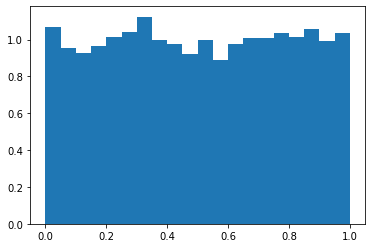

In [31]:
sample1 = np.random.uniform(0,1,10000)
plt.hist(sample1,bins =20, density=True )

### Q4. Option price

In [25]:
def Call_MC_VDC_QMC(st, t, T, sigma, r, K, n = 1000,base=2):
    normal = norm.ppf(vdc_sequence(n,base))
    payoff = []
    for i in range(n):
        g = normal[i]
        sT = st * math.exp((r - 0.5 * sigma**2)*(T-t) + sigma * math.sqrt(T-t) * g)
        payoff.append(max(sT-K,0))
    mu = math.exp(-r*(T-t))*np.mean(payoff)
    alpha = 2.576
    print("QMC price: %f " %(mu))
    return(mu)

In [29]:
_ = Call_MC(100,0,0.5, 0.2, 0.01,100,10000)
_ = Call_MC_VDC_QMC(100,0,0.5, 0.2, 0.01,100,10000,base=2)
_= Call_formula(100,0,0.5, 0.2, 0.01,100)

MC price: 5.813595 in [5.578315,6.048875] std: 9.133543
QMC price: 5.865156 
BS price: 5.876024


BS price: 5.876024
QMC price: 5.385894 
MC price: 5.363527 in [3.260613,7.466442] std: 8.163488
QMC price: 5.801389 
MC price: 5.223847 in [4.541673,5.906021] std: 8.374313
QMC price: 5.865156 
MC price: 5.882512 in [5.644859,6.120164] std: 9.225629
QMC price: 5.874544 
MC price: 5.884368 in [5.809704,5.959032] std: 9.165724
QMC price: 5.875853 
MC price: 5.873634 in [5.849954,5.897315] std: 9.192746


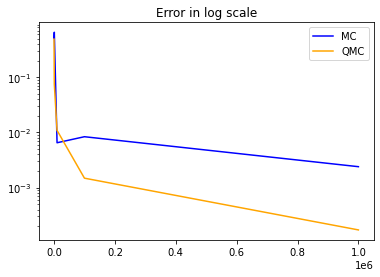

In [33]:
base = 2
real_price = Call_formula(100,0,0.5, 0.2, 0.01,100)
error_qmc = []
error_mc = []
sample_size = [100,1000,10000,100000,1000000]
for k in sample_size:
    qmc_price = Call_MC_VDC_QMC(100,0,0.5, 0.2, 0.01,100,k,base)
    mc_price = Call_MC(100,0,0.5, 0.2, 0.01,100,k)
    error_qmc.append(+abs(real_price - qmc_price))
    error_mc.append(abs(real_price - mc_price))
plt.figure()
plt.title("Error in log scale")
plt.plot(sample_size,error_mc,color="blue",label="MC")
plt.plot(sample_size,error_qmc,color = "orange",label="QMC")
plt.legend()
plt.yscale('log')

### Q5. Randomized QMC

In [34]:
def Call_MC_VDC_RQMC(st, t, T, sigma, r, K, m=10, n = 10000,base=2):
    U = vdc_sequence(n,base)
    payoff = []
    for j in range(m):
        payoff_tmp = []
        V = np.random.uniform()
        for i in range(n):
            g = norm.ppf((U[i]+V)%1)
            sT = st * math.exp((r - 0.5 * sigma**2)*(T-t) + sigma * math.sqrt(T-t) * g)
            payoff_tmp.append(max(sT-K,0))
        payoff.append(np.mean(payoff_tmp))
    mu = math.exp(-r*(T-t))*np.mean(payoff)
    std = np.std(payoff)
    alpha = 2.576
    print("RQMC price: %f in [%f,%f] std: %f (RQMC)" %(mu, mu - alpha * std / math.sqrt(m) , mu + alpha * std / math.sqrt(m),std))
    return(mu)

In [ ]:
M_array = [100,1000,10000]
for M in M_array:
    print("M = %d" %(M))
    _ = Call_MC(100,0,0.5, 0.2, 0.01,100,M*10)
    _ = Call_MC_VDC_RQMC(100,0,0.5, 0.2, 0.01,100,M)

M = 100
MC price: 5.503570 in [4.794318,6.212822] std: 8.706726
RQMC price: 5.875935 in [5.874851,5.877019] std: 0.004209 (RQMC)
M = 1000
MC price: 5.922523 in [5.685227,6.159818] std: 9.211780
RQMC price: 5.875632 in [5.875323,5.875940] std: 0.003788 (RQMC)
M = 10000
MC price: 5.882636 in [5.807964,5.957309] std: 9.166710


# 7. Halton Sequence

In [364]:
def halton_sequence(n= 1000,base1 = 2, base2= 3):
    U1 = vdc_sequence(n,base1)
    U2 = vdc_sequence(n,base2)
    return(U1,U2)

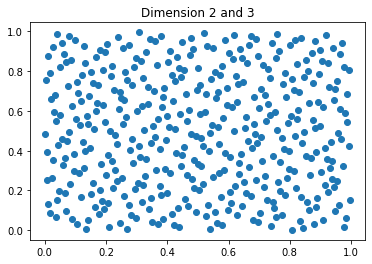

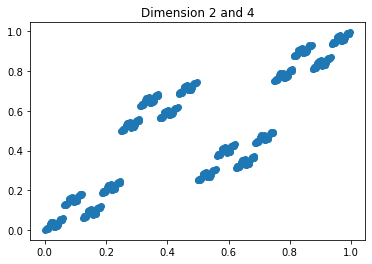

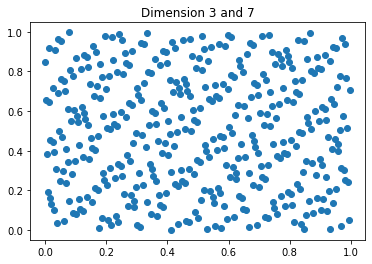

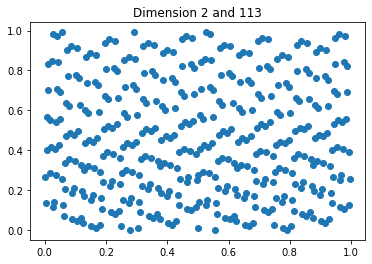

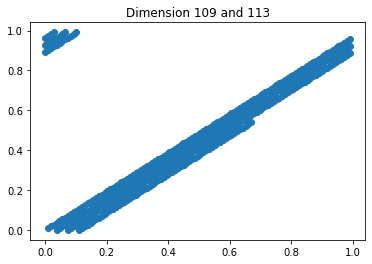

In [365]:
N = 400
sample1,sample2 = halton_sequence(N,2,3)
plt.figure()
plt.title("Dimension 2 and 3")
plt.scatter(sample1,sample2)
sample1,sample2 = halton_sequence(N,2,4)
plt.figure()
plt.title("Dimension 2 and 4")
plt.scatter(sample1,sample2)
sample1,sample2 = halton_sequence(N,3,7)
plt.figure()
plt.title("Dimension 3 and 7")
plt.scatter(sample1,sample2)
sample1,sample2 = halton_sequence(N,2,113)
plt.figure()
plt.title("Dimension 2 and 113")
plt.scatter(sample1,sample2)
sample1,sample2 = halton_sequence(N,109,113)
plt.figure()
plt.title("Dimension 109 and 113")
plt.scatter(sample1,sample2)

In [366]:
def Exchange_option_MC(st, t, T, sigma, r, n= 1000, rho = 0.5):
    payoff = []
    sample1 = Box_Muller(n)
    sample2 = Box_Muller(n)
    
    C =  [[1,0],[rho,np.sqrt(1-rho**2)]]
    
    for i in range(n):
        g = np.dot(np.dot(C,[sample1[i],sample2[i]]),np.transpose(C))
        sT1 = st * math.exp((r - 0.5 * sigma**2)*(T-t) + sigma * math.sqrt(T-t) * g[0])
        sT2 = st * math.exp((r - 0.5 * sigma**2)*(T-t) + sigma * math.sqrt(T-t) * g[1])
        payoff.append(max(sT1-sT2,0))
    mu = math.exp(-r*(T-t))*np.mean(payoff)
    std = np.std(payoff)
    alpha = 2.576
    print("MC price: %f in [%f,%f] std: %f" %(mu, mu - alpha * std / math.sqrt(n) , mu + alpha * std / math.sqrt(n),std))
    return(mu)

In [367]:
Exchange_option_MC(100,0,0.5, 0.2, 0.01,1000)

MC price: 3.922552 in [3.443002,4.402102] std: 5.886918


3.922552015614528

In [381]:
def Exchange_option_QMC(st, t, T, sigma, r, n= 1000, rho = 0.5):
    payoff = []
    sample1,sample2 = halton_sequence(n,2,3)
    sample1,sample2 = norm.ppf(sample1),norm.ppf(sample2)
    
    C =  [[1,0],[rho,np.sqrt(1-rho**2)]]
    
    for i in range(n):
        g = np.dot(np.dot(C,[sample1[i],sample2[i]]),np.transpose(C))
        sT1 = st * math.exp((r - 0.5 * sigma**2)*(T-t) + sigma * math.sqrt(T-t) * g[0])
        sT2 = st * math.exp((r - 0.5 * sigma**2)*(T-t) + sigma * math.sqrt(T-t) * g[1])
        payoff.append(max(sT1-sT2,0))
    mu = math.exp(-r*(T-t))*np.mean(payoff)
    std = np.std(payoff)
    alpha = 2.576
    print("QMC price: %f" %(mu))
    return(mu)

In [382]:
Exchange_option_QMC(100,0,0.5, 0.2, 0.01,1000)

QMC price: 4.073050


4.07305017337395

In [389]:
def convert_horner(num, base=16):
    sym = ['0', '1', '2', '3', '4', '5', '6', '7',
           '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
    r = 0
    for n in num:
        r = r * base + sym.index(n)
    return r

In [135]:
def next_bary(a,b=2):
    m = len(a)
    a_next = ""
    carry = True
    index = m-1
    while index >= 0:
        if carry:
            if (a[index] == str(b-1)):
                a_next = '0'+a_next
            else:
                a_next = str(int(a[index]) + 1) + a_next
                carry = False
        else:
            a_next = a[index] + a_next
        index -=1
    if carry:
        a_next = '1' + a_next
    return a_next

# Ratio of uniforms

acceptance rate : 62.64 %


Text(0.5, 1.0, 'Absolute value of$\\mathcal{N}(0,1)$')

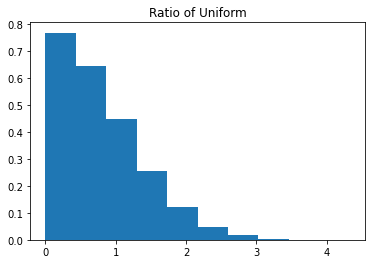

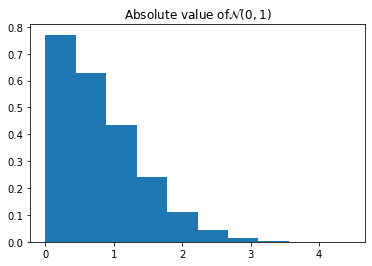

In [11]:
sample = []
nb_of_simulation = 0
N = 100000
for i in range(N):
    U1 = random.uniform(0,1)
    U2 = random.uniform(0,1)
    M = np.exp(-0.25*((U2/U1)**2))
    nb_of_simulation +=1
    while ( U1 > M):
        U1 = random.uniform(0,1)
        U2 = random.uniform(0,1)
        M = np.exp(-0.25*((U2/U1)**2))
        nb_of_simulation +=1
    sample.append(U2/U1)
plt.figure()
plt.hist(sample,density=True)
plt.title("Ratio of Uniform")
print("acceptance rate : %.2f %%" %(N/nb_of_simulation*100))
sample3= []
for i in range(100000):
    N = np.random.normal()
    while N < 0:
        N = np.random.normal()
    sample3.append(N)
plt.figure()
plt.hist(sample3,density=True)
plt.title("Absolute value of$\mathcal{N}(0,1)$")